In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("../data/01_raw/2022/tickets.csv")
df.columns

Index(['ID', 'Beschreibung', 'Kategorie ID', 'Kategorietext',
       'Unterkategorie ID', 'Unterkategorietext', 'Ticket Label',
       'Abteilung Label', 'Produkt Label', 'Priorität', 'Status',
       'Angelegt Am', 'Angelegt Von', 'Geändert Am', 'Geändert Von',
       'Auftraggeber', 'Meldender', 'Support Team', 'Bearbeiter',
       'Erste Nachricht', 'Letzte Nachricht'],
      dtype='object')

In [5]:
# remove blank space values
df = df.replace(r'^\s*$', np.nan, regex=True)
df.dropna(inplace=True, subset=["Ticket Label", "Abteilung Label", "Produkt Label"])

<Axes: >

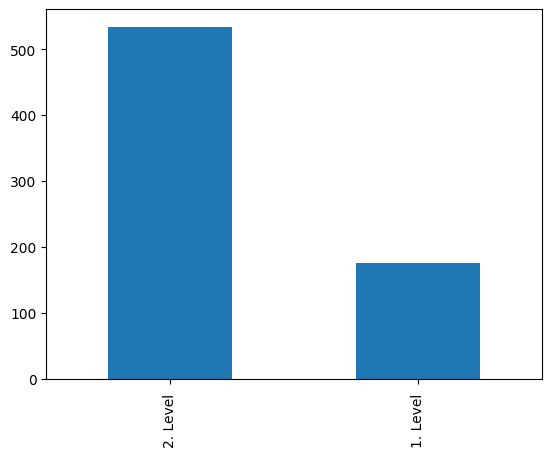

In [12]:
df["Ticket Label"].value_counts().plot.bar()

<Axes: >

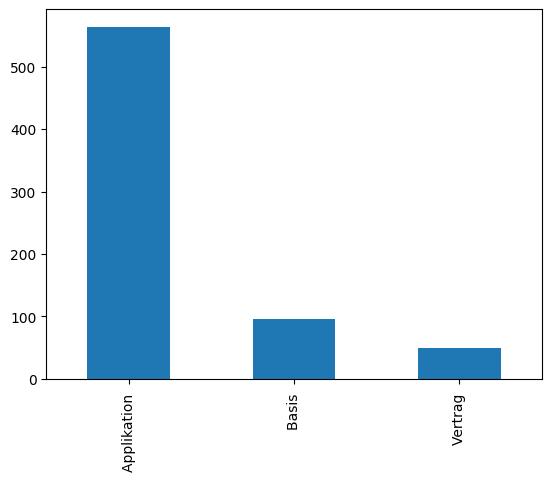

In [13]:
df["Abteilung Label"].value_counts().plot.bar()